In [1]:
#ead the data into a pandas DataFrame
import pandas as pd


In [2]:
pima = pd.read_csv('diabetes.csv')

In [3]:
# print the first 5 rows of data
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
import matplotlib.pyplot as plt

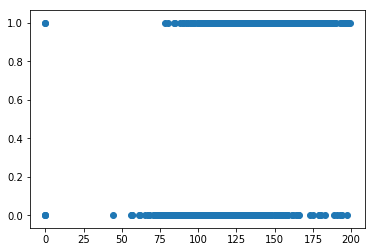

In [6]:
plt.scatter(pima.Glucose,pima.Outcome)

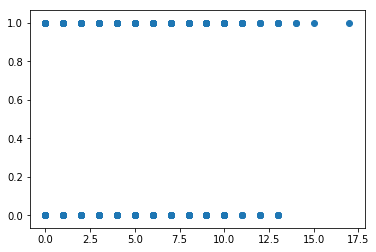

In [7]:
plt.scatter(pima.Pregnancies,pima.Outcome)

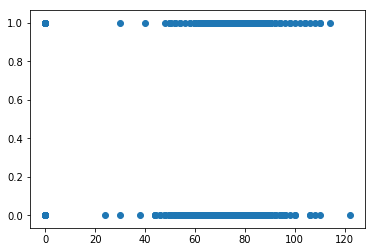

In [8]:
plt.scatter(pima.BloodPressure,pima.Outcome)

In [9]:
pima.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

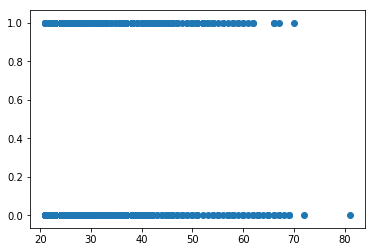

In [10]:
plt.scatter(pima.Age,pima.Outcome)

In [11]:
# define X and y

y = pima.Outcome

X = pima.drop(['Outcome'],axis=1)


In [12]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [13]:
y.head(5)

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [14]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [15]:
# train a logistic regression model on the training set

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [17]:
# calculate accuracy

from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred_class))

0.8072916666666666


In [18]:
# examine the class distribution of the testing set (using a Pandas Series method)

y_test.value_counts()

0    130
1     62
Name: Outcome, dtype: int64

In [19]:
# calculate the percentage of ones
y_test.mean()

0.3229166666666667

In [20]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6770833333333333

In [21]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.6770833333333333

Comparing the true and predicted response values

In [22]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0]


In [23]:
# IMPORTANT: first argument is true values, second argument is predicted values

print(metrics.confusion_matrix(y_test, y_pred_class))

[[119  11]
 [ 26  36]]


In [24]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [25]:
#Classification Accuracy

print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.8072916666666666
0.8072916666666666


In [26]:
#Misclassification rate

print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.19270833333333334
0.19270833333333337


In [27]:
# Recall or True Positive Rate
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))


0.5806451612903226
0.5806451612903226


In [28]:
#Specificity

print(TN / float(TN + FP))

0.9153846153846154


In [29]:
#False Positive Rate

print(FP / float(TN + FP))

0.08461538461538462


In [30]:
#Precision

print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.7659574468085106
0.7659574468085106


In [31]:
import matplotlib.pyplot as plt

In [32]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10,1]

array([0.89545652, 0.21342278, 0.14096238, 0.60299844, 0.17219378,
       0.07619187, 0.68990336, 0.74887939, 0.44247096, 0.37582452])

In [33]:
plt.scatter()

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

In [34]:
logreg.predict(X_test)[0:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [35]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

Text(0,0.5,'Frequency')

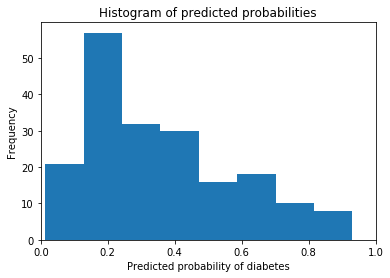

In [36]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

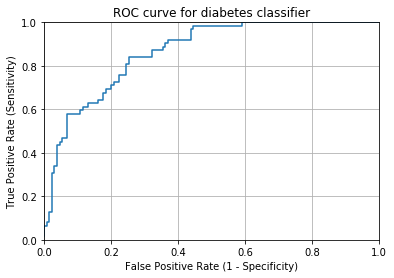

In [37]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [38]:
print(thresholds)

[0.93085792 0.88188339 0.86168212 0.8372052  0.8346633  0.78927292
 0.78370451 0.68726315 0.68499661 0.67399059 0.67382128 0.62049285
 0.61810938 0.61124625 0.60316118 0.60299844 0.56949978 0.53253113
 0.47472345 0.47378503 0.47322612 0.4707139  0.45866355 0.45763723
 0.44247096 0.43298515 0.42679491 0.40852282 0.40733654 0.40509922
 0.39691619 0.39390604 0.39225774 0.39221081 0.37582452 0.36736493
 0.36196186 0.35735222 0.35697003 0.3436454  0.31041805 0.30276726
 0.297204   0.29103781 0.28456741 0.27923145 0.27161359 0.26856267
 0.24892356 0.23961028 0.23550138 0.22972325 0.18785473 0.18682027
 0.01272256]


In [39]:
fpr

array([0.        , 0.        , 0.00769231, 0.00769231, 0.01538462,
       0.01538462, 0.02307692, 0.02307692, 0.03076923, 0.03076923,
       0.03846154, 0.03846154, 0.04615385, 0.04615385, 0.05384615,
       0.05384615, 0.06923077, 0.06923077, 0.10769231, 0.10769231,
       0.11538462, 0.11538462, 0.13076923, 0.13076923, 0.16153846,
       0.16153846, 0.17692308, 0.17692308, 0.18461538, 0.18461538,
       0.2       , 0.2       , 0.20769231, 0.20769231, 0.22307692,
       0.22307692, 0.24615385, 0.24615385, 0.25384615, 0.25384615,
       0.32307692, 0.32307692, 0.35384615, 0.35384615, 0.36153846,
       0.36153846, 0.36923077, 0.36923077, 0.43846154, 0.43846154,
       0.44615385, 0.44615385, 0.59230769, 0.59230769, 1.        ])

In [ ]:
logreg.coef_

In [ ]:
logreg.intercept_